**Liên kết với drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Gọi các thư viện cần thiết**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

**Đọc dữ liệu bằng thư viện pandas**

In [5]:
PATH = '/content/drive/MyDrive/TUDTK/Dự đoán/SEATTLE TACOMA AIRPORT, WA US.csv'
df = pd.read_csv(PATH) # đọc file csv
df = df.drop(['STATION', 'NAME', 'DATE'], axis=1) # loại bỏ 3 cột station, name, date
df

,AWND,CDSD,CLDD,DP01,DP10,DSND,DSNW,DT00,DT32,DX32,...,WDF1,WDF2,WDF5,WDFG,WDFM,WSF1,WSF2,WSF5,WSFG,WSFM
0,NaN,0,0,16,13,0.0,0.0,0,18,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0,0,16,11,0.0,1.0,0,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,0,14,7,0.0,0.0,0,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,0,20,11,0.0,0.0,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,0,16,11,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,8.5,362,0,21,11,0.0,0.0,0,0,0,...,NaN,210.0,180.0,NaN,NaN,NaN,33.1,50.0,NaN,NaN
886,9.4,362,0,25,20,0.0,0.0,0,1,0,...,NaN,200.0,190.0,NaN,NaN,NaN,44.1,58.0,NaN,NaN
887,9.8,362,0,22,17,5.0,3.0,0,7,5,...,NaN,200.0,190.0,NaN,NaN,NaN,30.0,44.0,NaN,NaN
888,6.9,0,0,15,12,2.0,0.0,0,7,0,...,NaN,220.0,210.0,NaN,NaN,NaN,30.0,46.0,NaN,NaN


**Xử lý các giá trị khuyết (NaN) trên dòng và cột**



In [6]:
df = df.dropna(axis = 0, how = 'all') #loại bỏ các dòng mà có tất cả các thuộc tính đều là NaN
df = df.dropna(axis = 1, how = 'any') # loại bỏ cột mà có NaN
df

,CDSD,CLDD,DP01,DP10,DT00,DT32,DX32,DX70,DX90,EMNT,EMXP,EMXT,HTDD,PRCP,TAVG,TMAX,TMIN
0,0,0,16,13,0,18,0,0,0,25,0.74,53,836,4.49,38.0,43.6,32.5
1,0,0,16,11,0,14,0,0,0,20,0.98,57,757,5.26,38.9,45.2,32.6
2,0,0,14,7,0,8,0,1,0,28,2.04,70,685,3.68,42.9,51.1,34.7
3,0,0,20,11,0,7,0,0,0,30,0.70,66,586,3.76,45.4,53.6,37.3
4,0,0,16,11,0,0,0,4,0,35,0.88,80,376,4.77,52.9,61.4,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,362,0,21,11,0,0,0,0,0,36,1.99,69,409,5.76,51.8,57.9,45.8
886,362,0,25,20,0,1,0,0,0,31,1.26,63,514,10.26,47.9,53.0,42.7
887,362,0,22,17,0,7,5,0,0,17,0.48,56,835,4.08,38.0,41.9,34.2
888,0,0,15,12,0,7,0,0,0,22,2.00,56,744,7.07,41.0,46.2,35.8


**In ra tên của các cột sau khi đã xử lý NaN**

In [7]:
headname = list(df.columns) # danh sách tên các cột
print(headname)

['CDSD', 'CLDD', 'DP01', 'DP10', 'DT00', 'DT32', 'DX32', 'DX70', 'DX90', 'EMNT', 'EMXP', 'EMXT', 'HTDD', 'PRCP', 'TAVG', 'TMAX', 'TMIN']


**Trích xuất dữ liệu**

In [8]:
df_Xtrain = df.drop(['PRCP'], axis = 1) # gán df_Xtrain là df bỏ đi cột PRCP 
df_ytrain = df['PRCP'] # gán df_ytrain là cột PRCP
df_Xtrain
df_ytrain

0       4.49
1       5.26
2       3.68
3       3.76
4       4.77
       ...  
885     5.76
886    10.26
887     4.08
888     7.07
889     5.32
Name: PRCP, Length: 890, dtype: float64

**Kiểm định tương quan**.


**Bạn có thể tham khảo thêm tại đây:**

https://medium.com/nerd-for-tech/hypothesis-testing-on-linear-regression-c2a1799ba964

In [9]:
import statsmodels.api as sm  

features_name = ['CONST'] + list(df_Xtrain.columns)
y_train = np.asarray(df_ytrain, dtype=float)
X_train = sm.add_constant(np.asarray(df_Xtrain, dtype=float))
model = sm.OLS(y_train, X_train).fit()
print(model.summary(xname=features_name))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     671.6
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:05:01   Log-Likelihood:                -943.15
No. Observations:                 890   AIC:                             1920.
Df Residuals:                     873   BIC:                             2002.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONST         -0.3786      2.950     -0.128      0.8

**Trích lọc ra những feature có p-value <= 0.05 (= alpha)**

**Điều này có nghĩa rằng những feature này có mối liên hệ tuyến tính với lượng mưa**

In [10]:
features_name = np.asarray(features_name)

selected_features = features_name[np.where(model.pvalues <= 0.05)]

print(selected_features)

['CDSD' 'DP01' 'DP10' 'DT00' 'DX70' 'EMXP']


In [11]:
X = np.array(df[selected_features[0]]).reshape(-1, 1)
for i in range(1, len(selected_features)): 
    X = np.c_[X, np.array(df[selected_features[i]]).reshape(-1, 1)]
y = np.array(df['PRCP']).reshape(-1, 1)
X = np.c_[np.ones((X.shape[0], 1)), X]

**Chia tập dữ liệu ra thành 2 tập train (80%) và test (20%)**

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 5)

**Lọc những điểm dữ liệu bị nhiễu**

**Tìm hiểu thêm tại đây:**

https://medium.com/mlearning-ai/how-to-find-and-remove-outliers-from-a-regression-in-python-449bc9e13101

In [13]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination = 0.05, n_neighbors = 20, novelty = False) # Tìm và loại bỏ 5% điểm dữ liệu ngoại lai
yhat = lof.fit_predict(X_train)

#Chọn toàn bộ hàng không phải là những điểm dữ liệu ngoại lai 

mask = yhat != -1

#Chọn toàn bộ hàng là những điểm dữ liệu ngoại lai

non_mask = yhat == -1

X_train, y_train = X_train[mask, :], y_train[mask]

print(X_train.shape, y_train.shape)

(676, 7) (676, 1)


**Hàm ReLU trả về x nếu x > 0 ngược lại trả về 0.**

In [14]:
def ReLU(x):
  return np.maximum(x, 0)

Sau bước kiểm định ta đã có được các thuộc tính CDSD ($x_1$), DP01 ($x_2$), DP10 ($x_3$), DT00 ($x_4$), ,DX70 ($x_5$), , EMXP ($x_6$) có liên hệ tuyến tính, giả sử $h_\theta$ là hàm biểu diễn lượng mưa dự đoán và m là số dòng của dữ liệu ta có:

$h_\theta(x) = \theta_0 + \theta_1 * x_1 + \theta_2 *x_2 + \theta_3 *x_3 + \theta_4 *x_4 + \theta_5 *x_5 + \theta_6 *x_6$
    
Hay ta có thể viết như sau: $h_\theta(x) = X * \theta $

Với: $X = \begin{pmatrix} x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \end{pmatrix} \in m \times 6, \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5 \\ \theta_6 \end{pmatrix}$, trong đó $x_0 = \begin{pmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{pmatrix}$

Hàm mất mát của mô hình Linear Regression được định nghĩa như sau:
    
$J(\theta) = \frac{1}{2m} \sum_{i = 1}^m\frac{1}{2}[h_\theta (x^{(i)}) - y^{
(i)}]^2$
   
Ta sẽ đi tìm các hệ số $\theta$ sao cho hàm $J(\theta)$ đạt giá trị bé nhất, thật vậy:
    
$\begin{pmatrix} h_\theta(x^1) \\ h_\theta(x^2) \\ \vdots \\ h_\theta(x^m) \end{pmatrix} - \begin{pmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{pmatrix}$

$= \begin{pmatrix} \theta x^1 \\ \theta x^2 \\ \vdots \\ \theta x^m \end{pmatrix} - \begin{pmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{pmatrix}$

$= \begin{pmatrix} \theta_0 + \theta_1 * x_1^1 + \theta_2 *x_2^1 + \theta_3 *x_3^1 + \theta_4 *x_4^1 + \theta_5 *x_5^1 + \theta_6 *x_6^1 \\ \theta_0 + \theta_1 * x_1^2 + \theta_2 *x_2^2 + \theta_3 *x_3^2 + \theta_4 *x_4^2 + \theta_5 *x_5^2 + \theta_6 *x_6^2 \\\vdots \\ \theta_0 + \theta_1 * x_1^m + \theta_2 *x_2^m + \theta_3 *x_3^m + \theta_4 *x_4^m + \theta_5 *x_5^m + \theta_6 *x_6^m \end{pmatrix} - \begin{pmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{pmatrix}$

$= X\theta - y$
    
Ta nhận thấy rằng: $J(\theta) = (X\theta - y)^T (X\theta - y)$, ta tìm giá trị của $\theta$ sao cho hàm này bé nhất bằng cách giải phương trình đạo hàm $J'(\theta) = 0$, thật vậy ta có:
    
$J(\theta) = (X\theta - y)^T (X\theta - y)$

$= [(X\theta)^T - y^T](X\theta - y)$

$= (X\theta)^TX\theta - (X\theta)^Ty - y^T X\theta + y^Ty$ 

$= (X\theta)^TX\theta - y^TX\theta - y^TX\theta + y^Ty$ 

$= (X\theta)^TX\theta - 2y^TX\theta + y^Ty$
    
$\Rightarrow J'(\theta) = 2X^TX\theta - 2y^TX$
    
$\Rightarrow 2X^TX\theta  = 2y^TX$
    
$\Rightarrow (X^TX)^{-1}X^TX\theta  = (X^TX)^{-1}y^TX$
    
$\Rightarrow \theta  = (X^TX)^{-1}y^TX$
    
Vậy là ta đã có công thức cho $\theta$ và xem như bài toán được giải xong. Công thức này được gọi là **"Normal Equation"**.
    
Tuy nhiên, để dễ dàng thì chúng tôi sẽ sử dụng thư viện skikit-learn cũng được lấy ý tưởng như trên. Ở đây ngoài sử dụng thuật LinearRegression chúng tôi còn cho kết quả dự đoán đi qua hàm **ReLU** để khi kết quả dự đoán ra âm thì sẽ trả về 0 ngược lại thì trả về chính nó.

Accuracy: 0.9116303786


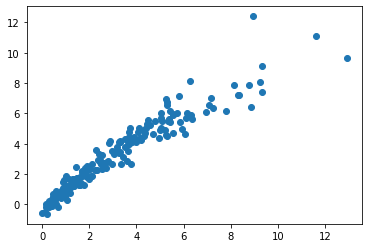

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

print('Accuracy: %.10f' % model.score(X_test, y_test))

y_pred = ReLU(model.predict(X_test)) # Cho kết quả dự đoán đi qua hàm ReLU để khi kết quả dự đoán < 0 sẽ trả về 0

#y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.show()

**Bảng dữ liệu gồm 2 cột, cột dự đoán và cột thực tế**

In [17]:
x_test = X_test[:, 0]
y_test2 = y_test[:, 0]
y_pred2 = y_pred[:, 0]

df_pred = pd.DataFrame({'Predicted': y_pred2, 'Actual': y_test2})
df_pred

,Predicted,Actual
0,-0.566827,0.00
1,0.379321,0.42
2,2.346860,2.55
3,2.908851,2.45
4,6.126028,5.43
...,...,...
173,1.760970,1.48
174,5.003679,4.11
175,0.021185,0.31
176,4.911261,5.22


In [18]:
df_pred.to_csv('/content/drive/MyDrive/TUDTK/Result.csv')

**Biểu đồ cho thấy sự chênh lệch giữa giá trị dự đoán và giá trị thực**

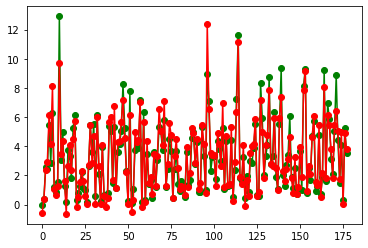

In [19]:
plt.plot(y_test, 'go-')
plt.plot(y_pred, 'ro-')
plt.show()

**Các thông số dùng để đánh giá mô hình**

In [20]:
from sklearn import metrics
print('R Squared:', metrics.r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE

R Squared: 0.9116303786087463
Mean Squared Error: 0.5396156016252175
Root Mean Squared Error: 0.7345853263067658
Mean Absolute Error: 0.522435954033311
